In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Exporting Data File

In [2]:
data  = pd.read_csv("data3.csv")
y = data["y"]
x = data["x"]

### Input Lambda Value

In [3]:
lamda = float(input("Enter the  value of lambda: "))

Enter the  value of lambda: 0.1


In [4]:
def lasso(x,y,lam,deg = 2):
    deg = deg+1
    Y = np.array(y).reshape(len(y),1)
    mat = np.zeros(shape=(deg,len(x)))
    for i in range(len(x)):
        a = []
        for j in range(deg):
            a.append(x[i]**j)
        mat[:,i] = a
    X = mat
    X_T = mat.T
    w = np.dot((np.linalg.inv(np.dot(X, X_T)+ lam*(np.eye(deg)))), np.dot(X,Y))
    return w

In [5]:
def MSE(x,y, W, deg):
    error = 0
    for i in range(len(x)):
        a = 0
        for j in range(deg+1):
            a = a+ (W[j]*(x[i]**j))
        error = error + (y[i]-a)**2
    return error

### Calculating Mean_square_error For Different Degrees

In [6]:
error = []
for i in range(1,11):
    W = lasso(x,y,lamda,i)
    e = MSE(x,y,W,i)
    #print(float(e))
    error.append(round(float(e),2))
Mean_square_error = list(error)
Degree = range(1,11)
deg_err = pd.DataFrame(list(zip(Degree, Mean_square_error)), columns=["Degree", "Mean_square_error"]); deg_err

,Degree,Mean_square_error
0,1,1442.93
1,2,1141.84
2,3,322.31
3,4,135.36
4,5,82.63
5,6,58.61
6,7,54.69
7,8,54.07
8,9,54.06
9,10,53.83


In [7]:
K = deg_err.loc[deg_err['Mean_square_error'] ==np.min(deg_err['Mean_square_error']), 'Degree']

### Ploting The Best Fit Line

/usr/lib/python3/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


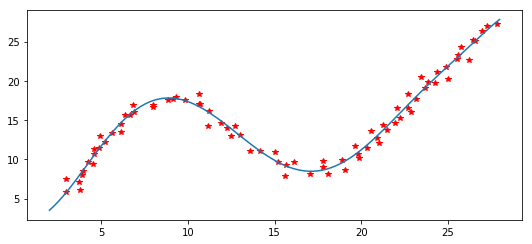

In [8]:
W = lasso(x,y,lamda, K.values[0])
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


x = list(data["x"])
y = list(data["y"])

plt.plot(x, y, 'r*')

x1 = np.linspace(2,28,100)
y1 = [0]*100
for i in range(len(x1)):
    a = 0
    for j in range(K.values[0]+1):
        a = a+ (W[j]*(x1[i]**j))
    y1[i] = a
plt.plot(x1, y1)